# Netflix Movies and TV Shows Analysis


### Table of Contents

* Introduction
* Tasks & Objectives
* Data inspection and wrangling
* Exploratory Data Analysis
* Conclusion


### INTRODUCTION
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform.
This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in May 2022 containing data available in the United States.

### TASKS & OBJECTIVES
* Understanding what content is available in different countries.
* Identifying the main content available on the streaming.
* Does Netflix has more focus on TV Shows than movies in recent years.
* Network analysis on the cast of the titles.
* Exploratory data analysis to find interesting insights.

### DATA INSPECTION AND WRANGLING
In this section, the data is loaded and the data integrity is assessed. Data cleaning is done; incosistencies are corrected and outliers are dealt with. 

In [107]:
# Load the necessary libraries needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [146]:
# load the dataset into a dataframe
data = pd.read_csv('C:/Users/AKINDILENI DAYO/Documents/Data Analysis/Netflix/titles.csv')
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"crime, drama",US,0,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"comedy, fantasy",GB,0,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,0,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,US,0,tt0070047,8.1,391942.0,95.337,7.7


In [109]:
# data structure
data.shape

(5806, 15)

In [110]:
# statistical details of the dataset
data.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,5806.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,0.763520,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,1.876199,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,0.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,0.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,0.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,1.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [111]:
# data information and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     5806 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5573 non-null   object 
 9   seasons               5806 non-null   int64  
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(4), int64(

In [112]:
# check for duplicates in the dataset
data.duplicated().sum()

0

In [113]:
# check for null values
data.isnull().sum()

id                        0
title                     1
type                      0
description              18
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries    233
seasons                   0
imdb_id                 444
imdb_score              523
imdb_votes              539
tmdb_popularity          94
tmdb_score              318
dtype: int64

In [114]:
# remove columns that are not essential to this analysis
data.drop(['description', 'imdb_id', 'imdb_votes', 'imdb_score'], axis=1, inplace = True)

In [115]:
# preview the outcome
data.head(2)

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,documentation,US,1,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"crime, drama",US,0,27.612,8.2


In [116]:
# remove null records
data.dropna(axis=0, how='any', inplace = True)
data.isnull().sum()

id                      0
title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [117]:
data.shape

(5352, 11)

In [118]:
# import the second dataset
credit = pd.read_csv('C:/Users/AKINDILENI DAYO/Documents/Data Analysis/Netflix/credits.csv')
credit.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [119]:
# data structure
credit.shape

(77213, 5)

In [120]:
# statistical information
credit.describe()

,person_id
count,7.721300e+04
mean,4.994603e+05
std,6.128431e+05
min,7.000000e+00
25%,4.158400e+04
50%,1.829850e+05
75%,8.415570e+05
max,2.371585e+06


In [121]:
# dataset information and datatype
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [122]:
# check for duplicates
credit.duplicated().sum()

0

In [123]:
# check for null values
credit.isnull().sum()

person_id       0
id              0
name            0
character    9627
role            0
dtype: int64

In [124]:
# remove columns not essential to analysis
credit.drop(['character', 'person_id'], axis=1, inplace = True)

In [125]:
# preview of outcome
credit.head(2)

,id,name,role
0,tm84618,Robert De Niro,ACTOR
1,tm84618,Jodie Foster,ACTOR


### EXPLORATORY DATA ANALYSIS
Now that the data has been cleaned, next is to explore the data to generate insights and complete the tasks highlighted above.

#### Countries and production quantity
Here we evaluate the total number of movies produced by each country and also the number of movies produced by some countries in conjunction with other countries.

In [126]:
data.production_countries.value_counts()

US                        1912
IN                         575
JP                         259
GB                         214
KR                         203
                          ... 
IT, CH, FR                   1
HK, IS, US                   1
GB, US, SG                   1
SG, US, GB, ID, CA, CN       1
TZ, GB                       1
Name: production_countries, Length: 434, dtype: int64

In [127]:
# Top 10 countries with highest production
top_10_countries = data.production_countries.value_counts().head(10)

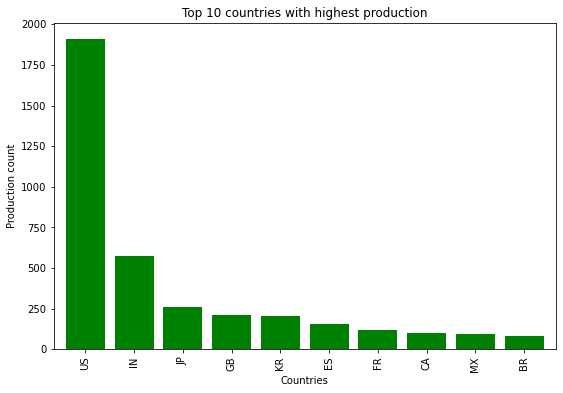

In [128]:
top_10_countries.plot(kind = 'bar', width =0.8, figsize=(9, 6), color='g')
plt.title('Top 10 countries with highest production')
plt.xlabel('Countries')
plt.ylabel('Production count')
plt.show()

From the graph showing the top 10 countries, 'US' has the highest number of production followed by 'IN' with a margin of 1,337.

#### Number of movies per year

In [129]:
# number of movies released per year
year_count = data.release_year.value_counts()
year_count.head(10)

2019    772
2018    729
2020    722
2021    674
2017    555
2016    355
2015    221
2022    185
2014    150
2013    129
Name: release_year, dtype: int64

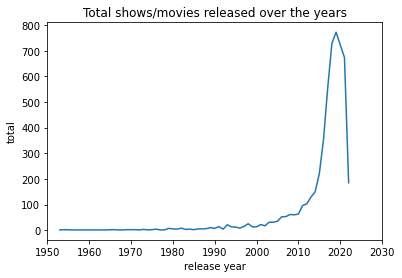

In [130]:
# plot a line graph to visualize the result
sns.lineplot(data= year_count)
plt.title('Total shows/movies released over the years')
plt.xlim(1950, 2030)
plt.xlabel('release year')
plt.ylabel('total')
plt.show()

The line graph shows a huge increase in production between 2010 and 2020. There has also been a great decrease in production from 2020 till date of this analysis.

#### Age certification
Here we check the total number of production based on its age certification.

In [131]:
# most common age certification
certification = data.age_certification.value_counts()
certification.head()

No rating    2327
TV-MA         802
R             571
PG-13         433
TV-14         428
Name: age_certification, dtype: int64

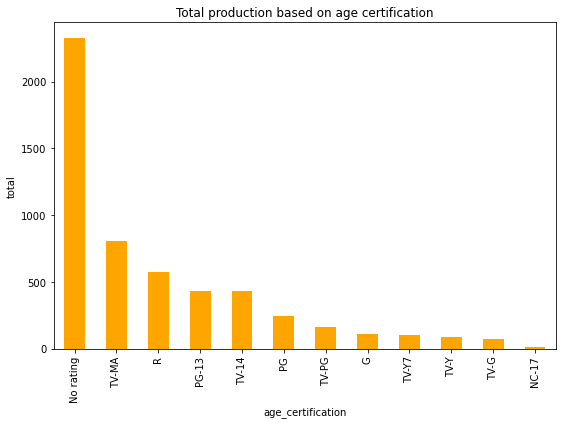

In [132]:
# plotting a bar chart to show the age certification
certification.plot(kind='bar', figsize=(9, 6), color='orange')
plt.title('Total production based on age certification')
plt.xlabel('age_certification')
plt.ylabel('total')
plt.show()

#### Distribution type
Does Netflix has more focus on TV Shows than movies in recent years?

In [133]:
# most popular type
type_count = data.type.value_counts()
type_count.head()

MOVIE    3480
SHOW     1872
Name: type, dtype: int64

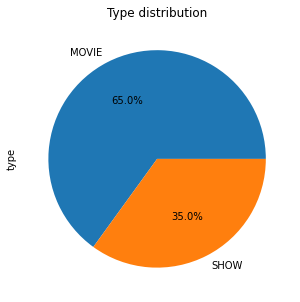

In [134]:
# plot a piechart
type_count.plot(kind= 'pie', figsize=(10, 5), autopct= '%1.1f%%')
plt.title('Type distribution')
plt.show()

#### Highly voted movies/Tvshows

In [135]:
data.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"crime, drama",US,0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"comedy, fantasy",GB,0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,1979,R,94,comedy,GB,0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,1973,R,133,horror,US,0,95.337,7.7
5,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"comedy, european",GB,4,12.919,8.3


In [136]:
# Top 10 movies with highest rating based on tmdb score and popularity
top_10_based_on_tmdb_rating = data.sort_values(['tmdb_score', 'tmdb_popularity'], ascending= False)[['title','tmdb_score','tmdb_popularity', 'type']].head(10)
top_10_based_on_tmdb_rating

,title,tmdb_score,tmdb_popularity,type
1582,The Haunted House,10.0,13.649,SHOW
3988,Mighty Express,10.0,9.174,SHOW
4228,The Queen and the Conqueror,10.0,7.958,SHOW
5461,Supercães,10.0,7.505,SHOW
5028,Smother-In-Law,10.0,7.430,SHOW
1600,Rainbow Ruby,10.0,6.616,SHOW
4645,The Charming Stepmom,10.0,6.550,SHOW
2786,The Unknown Hitman: The Story of El Cholo Adrián,10.0,6.419,SHOW
2194,Rainbow Rangers,10.0,5.692,SHOW
5765,Barbie: It Takes Two,10.0,5.321,SHOW


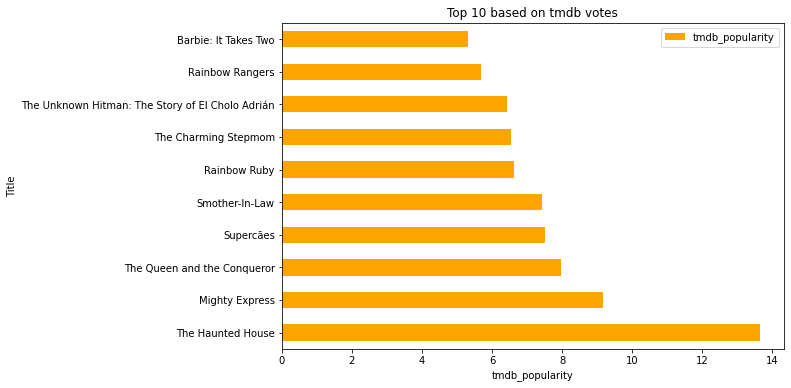

In [137]:
top_10_based_on_tmdb_rating.plot(kind='barh', x = 'title', y = 'tmdb_popularity', figsize=(9, 6), color = 'orange')
plt.title('Top 10 based on tmdb votes')
plt.xlabel('tmdb_popularity')
plt.ylabel('Title')
plt.show()

From the graph, 'Inception' has the highest vote followed by 'Forrest Gump'.

#### Top directors and actors
Based on tmdb popularity, here are the top 10 directors and actors.

In [138]:
# top directors and actors
# merge the datasets
data = data.merge(credit, how = 'outer', on= 'id')

In [139]:
data.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,name,role
0,tm84618,Taxi Driver,MOVIE,1976.0,R,113.0,"crime, drama",US,0.0,27.612,8.2,Robert De Niro,ACTOR
1,tm84618,Taxi Driver,MOVIE,1976.0,R,113.0,"crime, drama",US,0.0,27.612,8.2,Jodie Foster,ACTOR
2,tm84618,Taxi Driver,MOVIE,1976.0,R,113.0,"crime, drama",US,0.0,27.612,8.2,Albert Brooks,ACTOR
3,tm84618,Taxi Driver,MOVIE,1976.0,R,113.0,"crime, drama",US,0.0,27.612,8.2,Harvey Keitel,ACTOR
4,tm84618,Taxi Driver,MOVIE,1976.0,R,113.0,"crime, drama",US,0.0,27.612,8.2,Cybill Shepherd,ACTOR


##### Top 10 directors

In [140]:
# filter only directors
director = data[data['role'] == 'DIRECTOR']
director.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,name,role
36,tm84618,Taxi Driver,MOVIE,1976.0,R,113.0,"crime, drama",US,0.0,27.612,8.2,Martin Scorsese,DIRECTOR
83,tm127384,Monty Python and the Holy Grail,MOVIE,1975.0,PG,91.0,"comedy, fantasy",GB,0.0,18.216,7.8,Terry Jones,DIRECTOR
84,tm127384,Monty Python and the Holy Grail,MOVIE,1975.0,PG,91.0,"comedy, fantasy",GB,0.0,18.216,7.8,Terry Gilliam,DIRECTOR
106,tm70993,Life of Brian,MOVIE,1979.0,R,94.0,comedy,GB,0.0,17.505,7.8,Terry Jones,DIRECTOR
148,tm190788,The Exorcist,MOVIE,1973.0,R,133.0,horror,US,0.0,95.337,7.7,William Friedkin,DIRECTOR


In [141]:
# Top 10 directors based on tmdb score and popularity
top_10_director = director.sort_values(['tmdb_score','tmdb_popularity'], ascending = False)[['name', 'tmdb_score','tmdb_popularity']].head(10)
top_10_director

,name,tmdb_score,tmdb_popularity
27065,tooniverse,10.0,13.649
68080,Alex Cabral,10.0,7.430
27249,Shin Tae sik,10.0,6.616
63632,Peerapol Kirdjareun,10.0,6.550
63258,Fabio Ock,10.0,4.847
40172,Ding Pei,10.0,4.179
71460,Phil Allora,10.0,3.669
71461,Jae Woo Kim,10.0,3.669
63859,Donnie Lai Cheun-Yu,10.0,3.412
58642,Alberto Lecchi,10.0,2.343


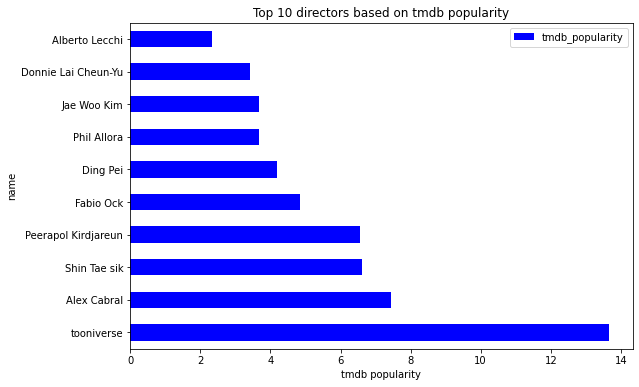

In [142]:
top_10_director.plot(kind= 'barh', y = 'tmdb_popularity', x = 'name', figsize= (9,6), color= 'blue')
plt.xlabel('tmdb popularity')
plt.ylabel('name')
plt.title('Top 10 directors based on tmdb popularity')
plt.show()

##### Top 10 actors

In [143]:
# filter only actors
actor = data[data['role'] == 'ACTOR']
actor.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,name,role
0,tm84618,Taxi Driver,MOVIE,1976.0,R,113.0,"crime, drama",US,0.0,27.612,8.2,Robert De Niro,ACTOR
1,tm84618,Taxi Driver,MOVIE,1976.0,R,113.0,"crime, drama",US,0.0,27.612,8.2,Jodie Foster,ACTOR
2,tm84618,Taxi Driver,MOVIE,1976.0,R,113.0,"crime, drama",US,0.0,27.612,8.2,Albert Brooks,ACTOR
3,tm84618,Taxi Driver,MOVIE,1976.0,R,113.0,"crime, drama",US,0.0,27.612,8.2,Harvey Keitel,ACTOR
4,tm84618,Taxi Driver,MOVIE,1976.0,R,113.0,"crime, drama",US,0.0,27.612,8.2,Cybill Shepherd,ACTOR


In [144]:
# Top 10 actors based on tmdb score and popularity
top_10_actor = actor.sort_values(['tmdb_score','tmdb_popularity'], ascending = False)[['name', 'tmdb_score', 'tmdb_popularity']].head(10)
top_10_actor

,name,tmdb_score,tmdb_popularity
60443,Emmanuel Esparza,10.0,7.958
60444,Essined Aponte,10.0,7.958
60445,Manuel Navarro,10.0,7.958
60446,Álvaro Benet,10.0,7.958
60447,Alejandro Rodriguez,10.0,7.958
60448,Luis Mesa,10.0,7.958
60449,Wolframio Sinué,10.0,7.958
60450,Gilma Escobar,10.0,7.958
60451,Maia Landaburu,10.0,7.958
60452,Alejandro Muñoz,10.0,7.958


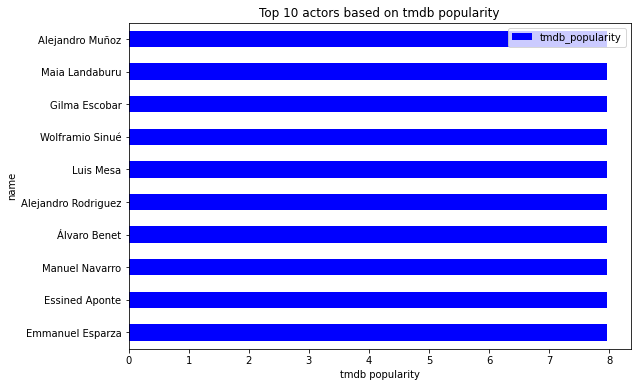

In [145]:
top_10_actor.plot(kind= 'barh', y = 'tmdb_popularity', x = 'name', figsize= (9,6), color= 'blue')
plt.xlabel('tmdb popularity')
plt.ylabel('name')
plt.title('Top 10 actors based on tmdb popularity')
plt.show()

### CONCLUSION
From the analysis of the Netflix dataset, I can conclusively state that 'US' had the highest number of independent production(1,912). Also, there was a huge decline in production since 2020 till date. The highly produced type was the movies(65%) while TVshows was 35%.
The highly scored and popular director based on tmdb score and popularity is Tooniverse.


The limitation I encountered in the process of analysis was having to deal with null values in some columns. Columns that were non-essential to this analysis and columns that had high null values were removed. Also, records with null values were expunged because the total number of records with null values was insignificant(<10%).